# ✅ Model regresji prostej

$$Y = \beta_0 + \beta_1 X + \epsilon,$$
gdzie $\epsilon \sim \mathcal{N}(0, \sigma)$.

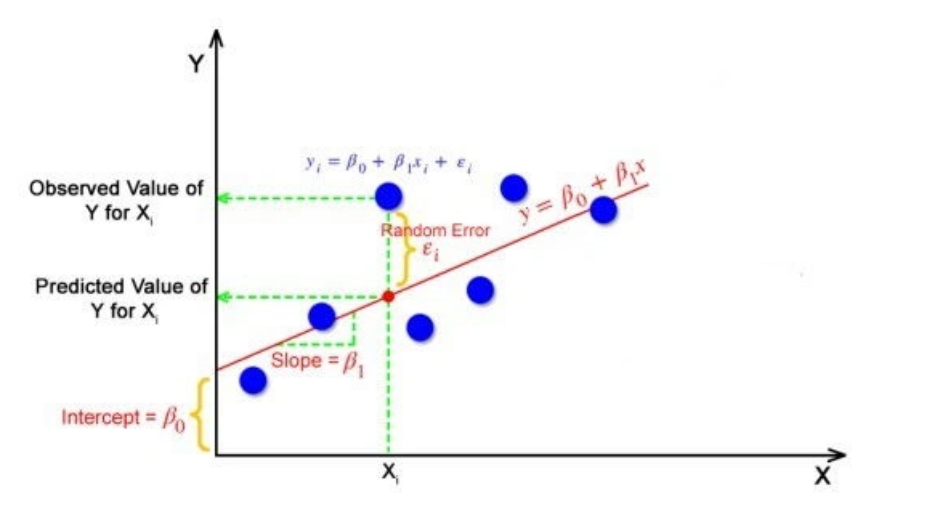
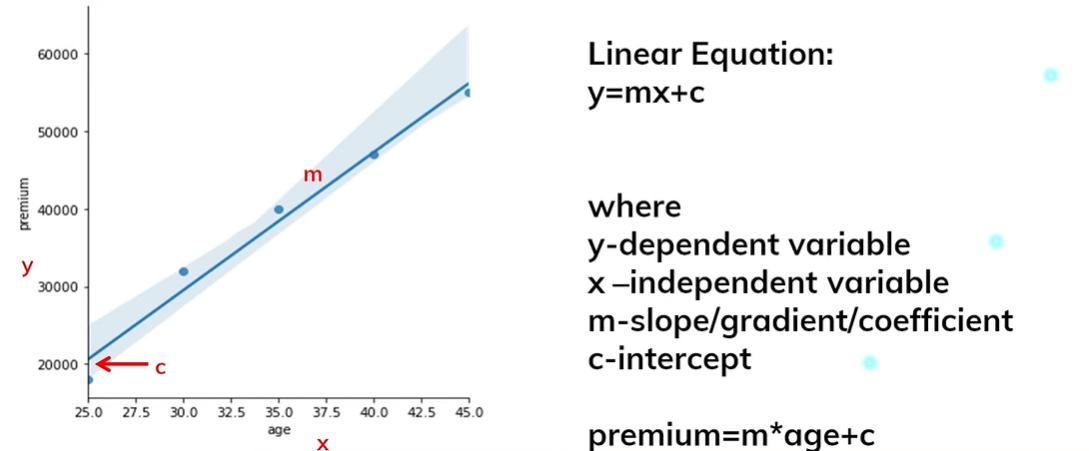

**Nomenklatura:**

$Y$ - zmienna zależna, zmienna odpowiedzi, zmienna objaśniana

$X$ - zmienna niezależna, predyktor, atrybut

$\beta_0, \beta_1$ - współczynniki regregresji

$\epsilon$ - błąd losowy

**Cel:**

Przy użyciu par  $(x_1, y_1), (x_2, y_2), \ldots (x_n, y_n)$ odpowiadającym pomiarom, odpowiednio,
zmiennej niezależnej $X$ i zmiennej zależnej $Y$, wyznaczyć współczynniki
$b_0, b_1$ tak, aby
$$y_i \approx b_0 + b_1 x_i$$

**Suma błędów  kwadratów:**
    
$$RSS = e_1^2 + e_2^2 + \ldots + e_n^2 = (y_1 - \hat{y_1})^2 + (y_2 - \hat{y_2})^2 + \ldots + (y_n - \hat{y_n})^2$$

**Funkcja kryterialna:**
    
$$(b_0, b_1) = \arg\!\min_{(b_0, b_1)} \sum_{i=1}^n (y_i - \hat{y_i})^2 = \arg\!\min_{(b_0, b_1)} \sum_{i=1}^n (y_i - (b_0 + b_1 x_i))^2$$

$$b_0 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n(x_i - \overline{x})^2}$$

$$b_1 = \overline{y} - b_1\overline{x}$$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

## Pakiet [`statsmodels`](https://www.statsmodels.org/stable/genindex.html)

In [ ]:
help(sm.datasets)

Help on package statsmodels.datasets in statsmodels:

NAME
    statsmodels.datasets - Datasets module

PACKAGE CONTENTS
    anes96 (package)
    cancer (package)
    ccard (package)
    china_smoking (package)
    co2 (package)
    committee (package)
    copper (package)
    cpunish (package)
    danish_data (package)
    elec_equip (package)
    elnino (package)
    engel (package)
    fair (package)
    fertility (package)
    grunfeld (package)
    heart (package)
    interest_inflation (package)
    longley (package)
    macrodata (package)
    modechoice (package)
    nile (package)
    randhie (package)
    scotland (package)
    spector (package)
    stackloss (package)
    star98 (package)
    statecrime (package)
    strikes (package)
    sunspots (package)
    template_data
    tests (package)
    utils

FUNCTIONS
    check_internet(url=None)
        Check if internet is available
    
    clear_data_home(data_home=None)
        Delete all the content of the data home cache.

In [ ]:
#pobieranie plików z statsmodels
cancer = sm.datasets.cancer.load_pandas()

In [ ]:
print(sm.datasets.cancer.DESCRSHORT)
print(sm.datasets.cancer.DESCRLONG)
print(sm.datasets.cancer.NOTE)

Breast Cancer and county population
The number of breast cancer observances in various counties
::

    Number of observations: 301
    Number of variables: 2
    Variable name definitions:

        cancer - The number of breast cancer observances
        population - The population of the county




In [ ]:
cancer.data.head()

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0


In [ ]:
# Pobieranie zbiorow danych z R

In [ ]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)

In [ ]:
#opis
print(carseats.__doc__)

.. container::

   .. container::

      ======== ===============
      Carseats R Documentation
      ======== ===============

      .. rubric:: Sales of Child Car Seats
         :name: sales-of-child-car-seats

      .. rubric:: Description
         :name: description

      A simulated data set containing sales of child car seats at 400
      different stores.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         Carseats

      .. rubric:: Format
         :name: format

      A data frame with 400 observations on the following 11 variables.

      ``Sales``
         Unit sales (in thousands) at each location

      ``CompPrice``
         Price charged by competitor at each location

      ``Income``
         Community income level (in thousands of dollars)

      ``Advertising``
         Local advertising budget for company at each location (in
         thousands of dollars)

      ``Population``
         Population size in region (in thousands)

      ``Pric

# Zadanie 1

Wczytaj zbiór `Carseats`, który zawierają dane o sprzedaży fotelików samochodowych pewnej firmy w 400 różnych lokalizacjach:

• sprzedaż jednostek (w tysiącach) w danej lokalizacji (`Sales`),

• cena sprzedaży konkurenta w danej lokalizacji (`CompPrice`),

• poziom dochodów społeczności wdanej lokalizacji w tys. dolarów (`Income`),

• wielkość populacji w danym regionie (`Population`),

• lokalny budżet reklamowy dla firmy w danej lokalizacji (`Advertising`),

• cena sprzedaży w danej lokalizacji (`Price`),

• na ile korzystne jest miejsce na półkach sklepu dla fotelików w danym regionie?
(`Shelveloc`),

• średni wiek ludności lokalnej (`Age`),

• poziom wykształcenia w każdej lokalizacji (`Education`),

• czy położenie sklepu jest w lokalizacji miejskiej? (`Urban`)

• czy sklep znajduje się w USA? (`US`)

1. Interesuje nas zależność wielkości sprzedaży fotelików samochodowych (w tys. jednostek) od ich ceny sprzedaży (zmienne `Sales` i `Price`). Określ zmienną zależną i niezależną, a następnie:
* Narysuj wykres rozproszenia tych zmiennych.
* Czy zmienne te są zależne?
* Oblicz dla nich współczynnik korelacji Pearsona.
       
2. Wyznacz funkcję regresji wielkości sprzedaży fotelików względem ich ceny. Narysuj ją na wykresie rozproszenia.

3. Oblicz i zinterpretuj wartość współczynnika determinacji R2.
       
4. Powtórz punkty 1-3 dla zależności wielkości sprzedaży fotelików samochodowych (w tys. jednostek) od ich ceny sprzedaży u konkurenta w danej lokalizacji (zmienne `Sales` i `CompPrice`).

In [ ]:
carseats_df = carseats.data

In [ ]:
#zmienna objaśniająca i objaśniana
X, y = carseats_df.iloc[:, carseats_df.columns != 'Sales'], carseats_df['Sales']

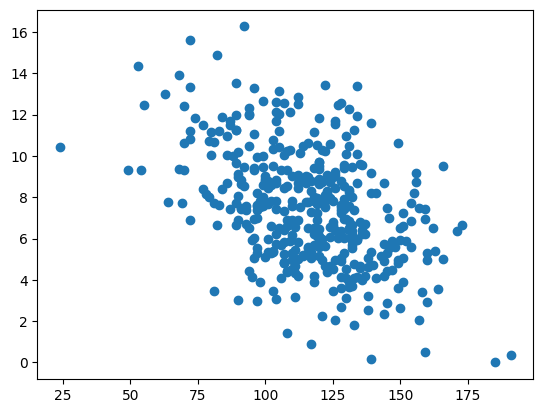

In [ ]:
#1
#Zależna Sales, niezależna Price
x = X['Price']
plt.scatter(x,y)

In [ ]:
#korelacja pearsonowska
np.corrcoef(x,y)[0,1]

-0.44495072784657264

### Wykres rozproszenia $x$ vs. $y$ z wyznaczoną przez model prostą regresji $y=13.6419 - 0.0531 \cdot x$

In [ ]:
#chcemy aby x był 2 wymiarowym arrayem z jedną kolumną
x1 = np.array(x).reshape(-1,1)

In [ ]:
#definicja modelu liniowego
lm1 = LinearRegression()
#funkcja fit ma za zadanie dopasowywać model do odpowiednich danych
lm1.fit(X = x1, y = y)

LinearRegression()

In [ ]:
#współczynniki modelu liniowego (bez wyrazu wolnego)
lm1.coef_

array([-0.05307302])

In [ ]:
#wyraz wolny
lm1.intercept_

13.641915176780913

In [ ]:
#funkcja licząca przewidywania na zadanym zbiorze, w naszym przypadku na obserwacjach, na których uczyliśmy model
lm1.predict(x1)

array([ 7.27315296,  9.23685464,  9.3960737 ,  8.49383238,  6.84856881,
        9.82065785,  7.91002918,  7.27315296,  7.06086088,  7.06086088,
        8.33461333,  8.65305144,  6.42398466,  9.07763559,  7.37929899,
        5.99940051,  7.80388314,  6.68934975, 10.03294992,  7.22007994,
        6.68934975,  7.85695616,  6.31783862,  7.85695616,  7.64466409,
        9.28992766,  6.68934975,  7.9631022 ,  8.49383238,  8.22846729,
        8.91841653,  6.68934975,  6.37091164,  6.84856881,  6.84856881,
        8.5469054 ,  8.33461333,  7.80388314,  8.22846729,  6.31783862,
        6.95471485,  7.06086088, 12.36816273,  6.5301307 ,  8.59997842,
        6.47705768,  9.92680388,  7.91002918,  8.44075936,  5.73403542,
        7.91002918,  7.91002918,  6.79549579,  7.32622598,  5.99940051,
        5.46867033,  9.18378162,  7.43237201,  8.17539427,  7.59159107,
        7.1139339 ,  7.9631022 ,  6.58320372,  8.28154031,  8.12232125,
        6.84856881,  8.81227049,  7.53851805,  6.5301307 ,  8.38

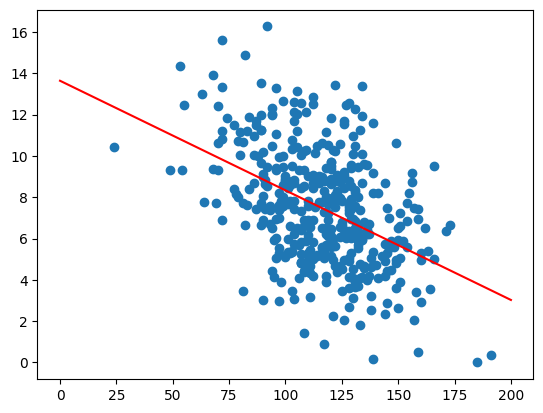

In [ ]:
#2
plt.scatter(x,y)
X_plot = np.linspace(0,200,200)
plt.plot(X_plot,X_plot*lm1.coef_+lm1.intercept_,color = 'red')
plt.show()

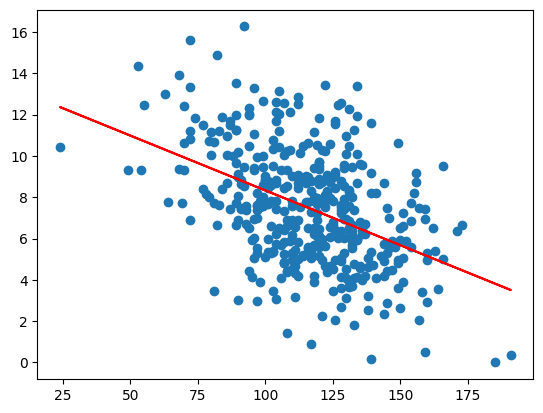

In [ ]:
#inaczej
plt.scatter(x,y)
plt.plot(x,x*lm1.coef_+lm1.intercept_,color = 'red')

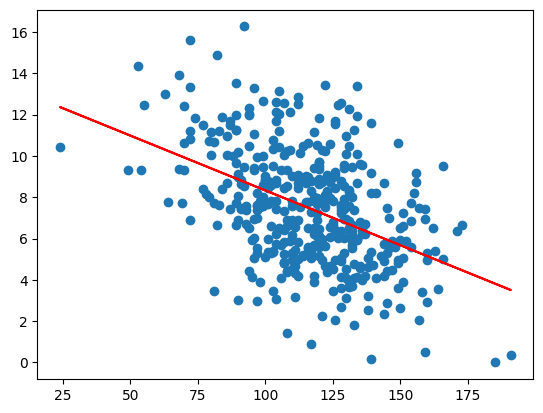

In [ ]:
#jeszcze inaczej
plt.scatter(x,y)
plt.plot(x,lm1.predict(x1),color = 'red')
#bo predykcje to nic innego jak \hat{y}=x*\hat{beta}_1+\hat{beta}_0

In [ ]:
#R^2
lm1.score(x1,y)

0.19798115021119478

In [ ]:
np.corrcoef(x,y)[0,1]**2 #w modelach z jedną zmienną R^2 to korelacja pearsonowska do kwadratu stąd nazwa

0.19798115021119475

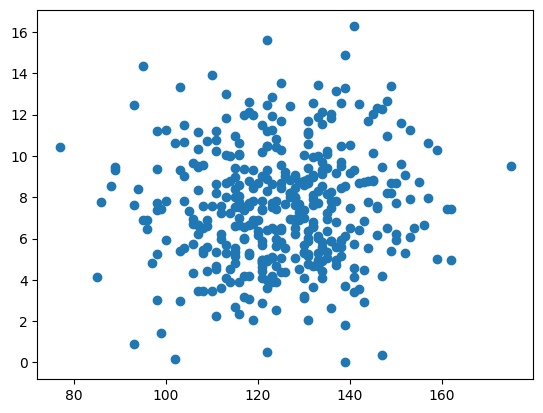

0.06407872955062155

In [ ]:
#4 Powtarzamy dla zmiennej Sales i CompPrice
#Zależna Sales, niezależna CompPrice
x = X['CompPrice']
plt.scatter(x,y)
plt.show()
np.corrcoef(x,y)[0,1]

In [ ]:
x1 = np.array(x).reshape(-1,1)
lm1 = LinearRegression()
lm1.fit(X = x1, y = y)

LinearRegression()

In [ ]:
lm1.score(x1,y)

0.004106083580821651

In [ ]:
np.corrcoef(x,y)[0,1]**2

0.0041060835808217

# Przekształcanie zmiennej objaśniającej

# Zadanie 2
Wczytaj dane `pollution.csv` (opis danych: https://www.rdocumentation.org/packages/SMPracticals/versions/1.4-3/topics/pollution). Dopasuj model regresji liniowej postaci: `mort~nox`. Czy model jest dobrze dopasowany do danych? Jeżeli nie, dlaczego?

In [ ]:
#https://www.rdocumentation.org/packages/SMPracticals/versions/1.4-3/topics/pollution
pollution = pd.read_csv("pollution.csv")
x = pollution['nox']
x1 = np.array(x).reshape(-1,1)
y = pollution['mort']
lm1=LinearRegression()
lm1.fit(x1,y)
lm1.score(x1,y)
#kiepskie R^2 nie ma zależności

0.0059874342734173025

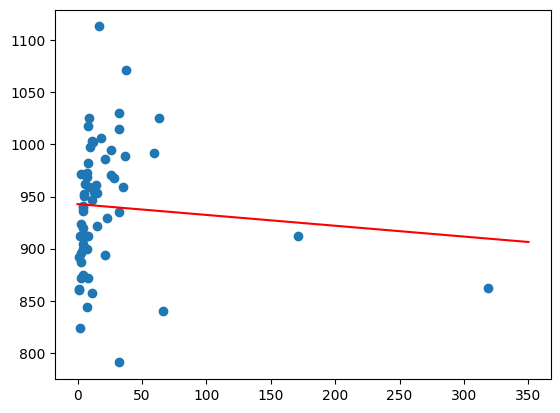

In [ ]:
plt.scatter(x,y)
X_plot = np.linspace(0,350,350)
plt.plot(X_plot,X_plot*lm1.coef_+lm1.intercept_,color = 'red')
plt.show()
#brak zależności liniowej

(array([52.,  5.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  1. ,  32.8,  64.6,  96.4, 128.2, 160. , 191.8, 223.6, 255.4,
        287.2, 319. ]),
 <BarContainer object of 10 artists>)

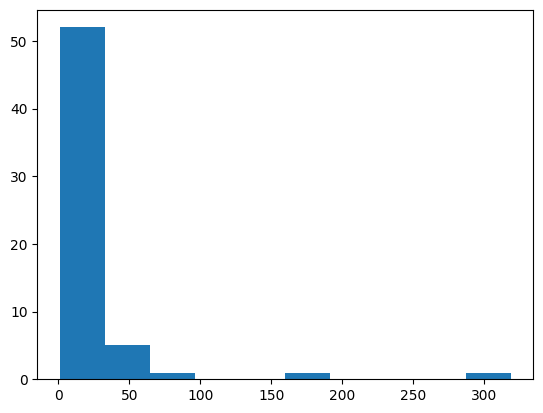

In [ ]:
plt.hist(x)
#ma pojedyncze obserwacje daleko, stąd ciężko dopasować model liniowy

(array([ 3.,  7.,  9., 13.,  9.,  7.,  7.,  3.,  1.,  1.]),
 array([0.        , 0.57651911, 1.15303822, 1.72955733, 2.30607644,
        2.88259555, 3.45911466, 4.03563377, 4.61215288, 5.18867199,
        5.7651911 ]),
 <BarContainer object of 10 artists>)

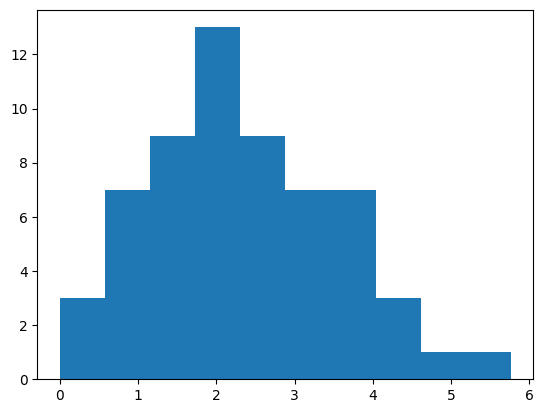

In [ ]:
plt.hist(np.log(x))
#przekształcenie logarytmiczne temu w tym wypadku przeciwdziała

In [ ]:
lm2=LinearRegression()
x2 = np.log(x1)
lm2.fit(x2,y)
lm2.score(x2,y)
# o rząd wielkości lepiej

0.08525775254975487

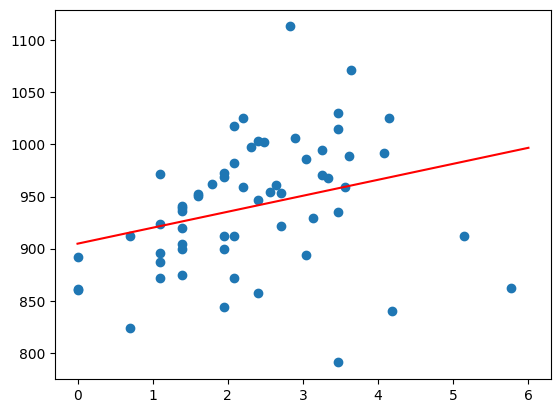

In [ ]:
plt.scatter(np.log(x),y)
X_plot = np.linspace(0,6,6)
plt.plot(X_plot,X_plot*lm2.coef_+lm2.intercept_,color = 'red')
plt.show()
#dane są bardziej liniowe

### Metoda Boxa-Coxa

Metoda Boxa-Coxa jest popularnym rozwiązaniem stosowanym do przekształcenia zmiennej. Ważnym założeniem metody jest dodatniość wszystkich wartość.
Metoda przekształca zmienną $z>0 \to t_{\lambda}(z)$, gdzie
$$
    t_{\lambda}(z)=\left.
    \begin{cases}
    \frac{z^{\lambda}-1}{\lambda} \quad &\text{dla} \quad \lambda\neq 0\\
    \log(z) \quad &\text{dla} \quad \lambda= 0.
    \end{cases}\right.
$$

Wybór $\lambda$ odbywa się na podstawie metody największej wiarogodności. Funkcja wiarogodności zakłada normalność błędów i ma następującą postać:
$$
L(\lambda)=-\frac{n}{2}\log\Big(\frac{\text{RRS}_{\lambda}}{n}\Big) + (\lambda-1)\sum\log y_i,
$$
gdzie $\text{RRS}_{\lambda}$, to $\text{RRS}$ dla odpowiedzi $t_{\lambda}(z)$.

## Zadanie 2.1
Znajdź najlepszy parametr $\lambda$ dla przekształcenia zmiennej niezależnej `nox`, przekształć zmienną zgodnie z uzyskaną wartością i dopasuj model prostej regresji liniowej.

In [ ]:
#co jeśli nie wiemy jakiej transformacji dokonać, a wiemy, że y>0. Użyjmy przekształcenia Boxa - Coxa
pt = PowerTransformer(method='box-cox',standardize=False)
x1_boxcox = pt.fit_transform(x1)
x1_boxcox

array([[2.37212004],
       [2.05654847],
       [1.64030605],
       [1.87733603],
       [3.04902336],
       [2.92857684],
       [2.92857684],
       [1.29442924],
       [2.20003388],
       [1.76816378],
       [1.87733603],
       [3.39157611],
       [2.78025577],
       [2.6244457 ],
       [1.97242926],
       [0.        ],
       [1.29442924],
       [1.87733603],
       [2.99164269],
       [1.29442924],
       [0.        ],
       [1.04037372],
       [1.04037372],
       [1.04037372],
       [1.48651427],
       [1.76816378],
       [1.29442924],
       [1.76816378],
       [4.38064428],
       [3.03046762],
       [2.50989984],
       [0.        ],
       [2.69122027],
       [2.13188324],
       [2.31932321],
       [1.04037372],
       [2.46697562],
       [2.78025577],
       [2.92857684],
       [3.34810063],
       [2.6244457 ],
       [1.29442924],
       [2.13188324],
       [1.97242926],
       [1.29442924],
       [2.37212004],
       [3.42223536],
       [4.019

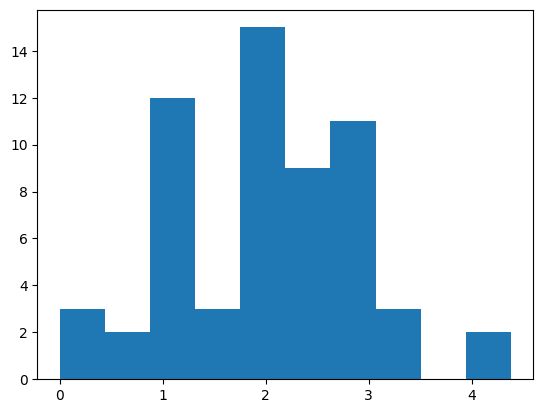

In [ ]:
plt.hist(x1_boxcox)
plt.show()
#też poradziło sobie z pojedynczymi obserwacjami o dużych wartościach nox

In [ ]:
lm3=LinearRegression()
lm3.fit(x1_boxcox,y)
lm3.score(x1_boxcox,y)

0.10487208498335421

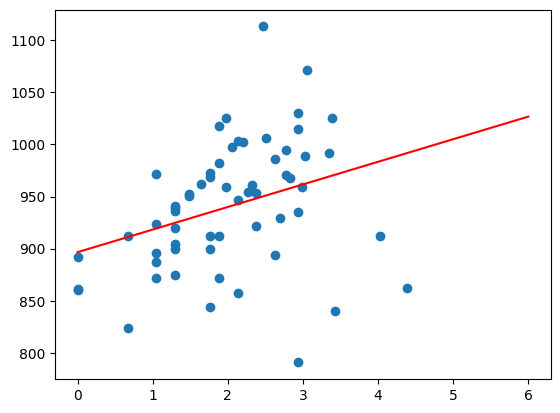

In [ ]:
plt.scatter(x1_boxcox,y)
X_plot = np.linspace(0,6,6)
plt.plot(X_plot,X_plot*lm3.coef_+lm3.intercept_,color = 'red')
plt.show()
#dane są bardziej liniowe niż to co było na początku

In [ ]:
#Pipeline
#Można połączyć PowerTransformera z LinearRegression
pipeline1 = make_pipeline(PowerTransformer(method='box-cox',standardize=False),LinearRegression())
lm4  = pipeline1.fit(X = x1,y = y)
print(lm4.score(x1,y))
#Aby dojść do parametrów elementu pipelina najpierw bierzemy indeks elementu,
#wywołujemy pipeline z numerem indeksu i po kropce parametr.
print(lm4[1].coef_)
print(lm4[1].intercept_)

0.10487208498335421
[21.68823618]
896.5673951328993


Co w przypadku, gdy zmienna losowa, która chcielibyśmy przekształcić byłaby niedodatnia?

### Metoda Yeo-Johnsona

$$
    t_{\lambda}(z)=\left.
    \begin{cases}
    \frac{(y+1)^{\lambda} -1}{\lambda} \quad &\text{dla} \quad \lambda\neq 0, y\geq 0,\\
    \log(y+1) \quad &\text{dla} \quad \lambda= 0, y\geq0,\\
    -\frac{(-y+1)^{2-\lambda}-1}{2-\lambda} \quad &\text{dla} \quad \lambda\neq 2, y<0,\\
    -\log(-y+1) \quad &\text{dla} \quad \lambda= 2, y<0.
    \end{cases}\right.
$$

In [ ]:
#PowerTransformer(method='yeo-johnson',standardize=False)

# Zmienne kategoryczne

# Zadanie 3
Wczytaj dane `Salaries` z pakieru `carData` i dopasuj model `salary ~ sex`. Zwróć uwagę na kodowanie zmiennej `sex`.

In [ ]:
# http://www.sthda.com/english/articles/40-regression-analysis/163-regression-with-categorical-variables-dummy-coding-essentials-in-r/
salaries = sm.datasets.get_rdataset(dataname="Salaries", package="carData")
salaries.data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [ ]:
y = salaries.data['salary']
x = salaries.data['sex']
x1 = np.array(x).reshape(-1,1)

In [ ]:
x1
#problem z dopasowaniem
#lm1 = LinearRegression()
#lm1.fit(x1,y)

array([['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male']

In [ ]:
enc = OneHotEncoder()
x1_transform = enc.fit_transform(x1).toarray()

In [ ]:
#albo jedna albo druga kolumna do modelu (niosą tą samą informację tylko inaczej poszczególne klasy pooznaczane)
x1_transform

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
x1_transform[:,1].reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
lm1 = LinearRegression()
lm1.fit(x1_transform[:,1].reshape(-1,1),y)

LinearRegression()

In [ ]:
lm1.coef_

array([14088.008738])

In [ ]:
lm1.intercept_

101002.41025641026

**Ważne:**

Gdy w danych występują zmienne kategoryczne, jak np. w tym przypadku zmienna `sex`, postępujemy z nią następująco

1. tworzymy, nową zmienną (ang. *dummy variable*), która

    **1**, gdy osoba jest mężczyzną,
    
    **0**, gdy osoba jest kobietą,
    
    
2. zmienna `sex` jest traktowana w równaniu regresji jako:

  $b_0 + b_1$ gdy osoba jest mężczyzną,

  $b_0$ gdy osoba jest kobietą.

teraz zmieniamy poziom referencyjny aby był nim Male wówczas zmienna sex jest traktowana w równaniu regresji jako:\
$c_0$ gdy osoba jest mężczyzną,\
$c_0+ c_1$ gdy osoba jest kobietą.\
Zatem $c_0 = b_0+b_1$ i $c_1 = b_0-c_0 = -b_1$

In [ ]:
lm2 = LinearRegression()
lm2.fit(x1_transform[:,0].reshape(-1,1),y)

LinearRegression()

In [ ]:
lm2.coef_

array([-14088.008738])

In [ ]:
-lm1.coef_

array([-14088.008738])

In [ ]:
lm2.intercept_

115090.41899441341

In [ ]:
lm1.coef_+lm1.intercept_

array([115090.41899441])

## Zadanie 3.1
Sprawdź jak została zakodowana zmienna `ShelveLoc` w zbiorze danych `Carseats`. Zmień poziom wartości dla tej zmiennej, sprawdź różnice w modelu.

In [ ]:
np.unique(carseats_df.ShelveLoc) #3 poziomy

array(['Bad', 'Good', 'Medium'], dtype=object)

In [ ]:
y = carseats_df['Sales']
x = carseats_df['ShelveLoc']
x1 = np.array(x).reshape(-1,1)

In [ ]:
x1

array([['Bad'],
       ['Good'],
       ['Medium'],
       ['Medium'],
       ['Bad'],
       ['Bad'],
       ['Medium'],
       ['Good'],
       ['Medium'],
       ['Medium'],
       ['Bad'],
       ['Good'],
       ['Medium'],
       ['Good'],
       ['Good'],
       ['Medium'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Medium'],
       ['Medium'],
       ['Good'],
       ['Medium'],
       ['Medium'],
       ['Bad'],
       ['Good'],
       ['Good'],
       ['Medium'],
       ['Bad'],
       ['Bad'],
       ['Good'],
       ['Medium'],
       ['Good'],
       ['Good'],
       ['Medium'],
       ['Medium'],
       ['Good'],
       ['Medium'],
       ['Medium'],
       ['Bad'],
       ['Bad'],
       ['Bad'],
       ['Medium'],
       ['Medium'],
       ['Medium'],
       ['Bad'],
       ['Medium'],
       ['Bad'],
       ['Bad'],
       ['Good'],
       ['Bad'],
       ['Bad'],
       ['Bad'],
       ['Medium'],
       ['Medium'],
       ['Medium'],
       ['Medium'

In [ ]:
enc = OneHotEncoder()
x1_transform = enc.fit_transform(x1).toarray()
x1_transform

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
lm1 = LinearRegression()
lm1.fit(x1_transform[:,1:3],y)

LinearRegression()

In [ ]:
#bad - y=b_0
#medium - y = b0+b2
#good - y = b0+b1

In [ ]:
lm1.coef_

array([4.69108333, 1.78365868])

In [ ]:
lm1.intercept_

5.522916666666667

In [ ]:
lm2 = LinearRegression()
lm2.fit(x1_transform[:,[0,2]],y)
#mamy nowe współczynniki c_0,c_1 i c_2
#Wyrażają się one przez:
#good: y=c_0 = b_0+b_1
#medium: y=c_0+c_2 = b_0+b_2
#bad: y = c_0+c_1 = b_0
#Zatem:
# c_0 = b_0+b_1
# c_1 = -b_1
# c_2 = b_2-b_1

LinearRegression()

In [ ]:
lm2.intercept_

10.214000000000002

In [ ]:
lm1.intercept_+lm1.coef_[0]

10.214000000000002